# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [723]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
print("Import essential libraries")

Import essential libraries


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [739]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [748]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

# conver create_at 
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
print("Convert create_at and actual_delivery_time to date format \n")
df.info()

Convert create_at and actual_delivery_time to date format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [751]:
# check the shape
print("Print the shape of the data frame \n")
df.shape

Print the shape of the data frame 



(175777, 14)

In [455]:
# print head 
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

In [755]:
# Convert categorical features to category type

print("All columns : ",df.columns)
# market_id                 | Integer ID representing the market where the restaurant is located.
# store_primary_category	| Category of the restaurant (e.g., fast food, dine-in).
# order_protocol	        | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.)

# As per the description market_id, store_primary_category and order_protocol are categoriecal colums
# conver these columns to category type 
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
print("After converting the columns in category data type \n")
print(df.dtypes)

All columns :  Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')
After converting the columns in category data type 

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [762]:
# Calculate time taken in minutes
# Difference between actual_delivery_time and created_at
df['delivery_time'] = df['actual_delivery_time'] - df['created_at']
# this will get the total difference. now it should be convert to minutes
df['time_taken'] = df['delivery_time'].dt.total_seconds() / 60
print(df[['created_at', 'actual_delivery_time','time_taken' ]].head())

           created_at actual_delivery_time  time_taken
0 2015-02-06 22:24:17  2015-02-06 23:11:17        47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25        44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35        55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46        59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36        46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [765]:
# Extract the hour and day of week from the 'created_at' timestamp
# Create daty of the week column
df['day_of_the_week'] = df['created_at'].dt.day_name()
df.head()
# Create a categorical feature 'isWeekend'
# this category is contains true false value where weekend is True and weekday is Falseabs
df['is_weekend'] = df['created_at'].dt.weekday.isin([5,6])
# convert is_weekend as category type
df['is_weekend'] = df['is_weekend'].astype('category')

print(df[['created_at', 'day_of_the_week', 'is_weekend']].head(10))


           created_at day_of_the_week is_weekend
0 2015-02-06 22:24:17          Friday      False
1 2015-02-10 21:49:25         Tuesday      False
2 2015-02-16 00:11:35          Monday      False
3 2015-02-12 03:36:46        Thursday      False
4 2015-01-27 02:12:36         Tuesday      False
5 2015-02-06 00:42:42          Friday      False
6 2015-02-08 02:04:17          Sunday       True
7 2015-01-31 04:35:54        Saturday       True
8 2015-01-31 02:21:23        Saturday       True
9 2015-01-31 23:45:12        Saturday       True


In [767]:
# Drop unnecessary columns
# drop actual_delivery_time, delivery_time, day_of_the_week should be dropped 
df = df.drop(columns=['actual_delivery_time', 'delivery_time', 'day_of_the_week', ])
print("After dropping unnecessary columns 'actual_delivery_time', 'delivery_time', 'day_of_the_week'\n")
df.info()

After dropping unnecessary columns 'actual_delivery_time', 'delivery_time', 'day_of_the_week'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   store_primary_category    175777 non-null  category      
 3   order_protocol            175777 non-null  category      
 4   total_items               175777 non-null  int64         
 5   subtotal                  175777 non-null  int64         
 6   num_distinct_items        175777 non-null  int64         
 7   min_item_price            175777 non-null  int64         
 8   max_item_price            175777 non-null  int64         
 9   total_onshift_dashers     175777 non-null  float64       
 10  total_busy_dashers        175777 

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [775]:
# Define target variable (y) and features (X)

# As deliver time is our target so y should be time_taken
y = df['time_taken']

# X should be all the columns except time_taken,created_at,actual_delivery_time
# So dropping these colums to get only X (features) 
X = df.drop(columns=[ 'time_taken'])

print("Target variable : time_taken")
print("Featrue variable", X.columns)
print("X shape : ", X.shape, "y shape : ", y.shape)

Target variable : time_taken
Featrue variable Index(['market_id', 'created_at', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'is_weekend'],
      dtype='object')
X shape :  (175777, 14) y shape :  (175777,)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [778]:
# Split data into training and testing sets

# Import train_test_split from sklearn 
from sklearn.model_selection import train_test_split
# Split 80% training, 20% testing useing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

# Print shape of training and test data
print("AFter split the data into train and test data with ratio of 80% and 20% \n")
print("X traning shape ", X_train.shape)
print("X test shape ",X_test.shape)
print("y train shape ", y_train.shape)
print("y test shape", y_test.shape)

AFter split the data into train and test data with ratio of 80% and 20% 

X traning shape  (140621, 14)
X test shape  (35156, 14)
y train shape  (140621,)
y test shape (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [782]:
# Check is there any null values

print("Check if there any null values \n",df.isnull().sum())

Check if there any null values 
 market_id                   0
created_at                  0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
time_taken                  0
is_weekend                  0
dtype: int64


### Observation : There is no null values in the data set.

In [787]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Numerical columms should be int and float types
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# categorical columns should be category type
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()

print("Create numerical and categorical columns \n")
print("Nuberical columns : ",numerical_cols)
print("\nCategorical columns : ", categorical_cols)


Create numerical and categorical columns 

Nuberical columns :  ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

Categorical columns :  ['market_id', 'store_primary_category', 'order_protocol', 'is_weekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [790]:
# Plot distributions for all numerical columns

# check the distribution  & skewness through histogram plot
print("Distributions for all numerical columns\n\n")
X_train[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram of Numerical Columns", fontsize=15)
plt.tight_layout()
plt.show()

Distributions for all numerical columns




In [792]:
# Check the pariaplot for correlation between each other
print("Plot priplot to check the correlation between each other \n")
sns.pairplot(X_train[numerical_cols])
plt.show()

Plot priplot to check the correlation between each other 



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [795]:
# Distribution of categorical columns

# For categorical columns best suits is countplot 
plt.figure(figsize=(12,8))

# Use subplot to show in single figure
# ['market_id', 'store_primary_category', 'order_protocol', 'is_weekend']

plt.subplot(3,2,1)
sns.countplot(x='market_id', data=X_train)
plt.title("market_id")

plt.subplot(3,2,2)
sns.countplot(x='store_primary_category', data=X_train)
plt.title("store_primary_category")

plt.subplot(3,2,3)
sns.countplot(x='order_protocol', data=X_train)
plt.title("order_protocol")

plt.subplot(3,2,4)
sns.countplot(x='is_weekend', data=X_train)
plt.title("is_weekend")

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

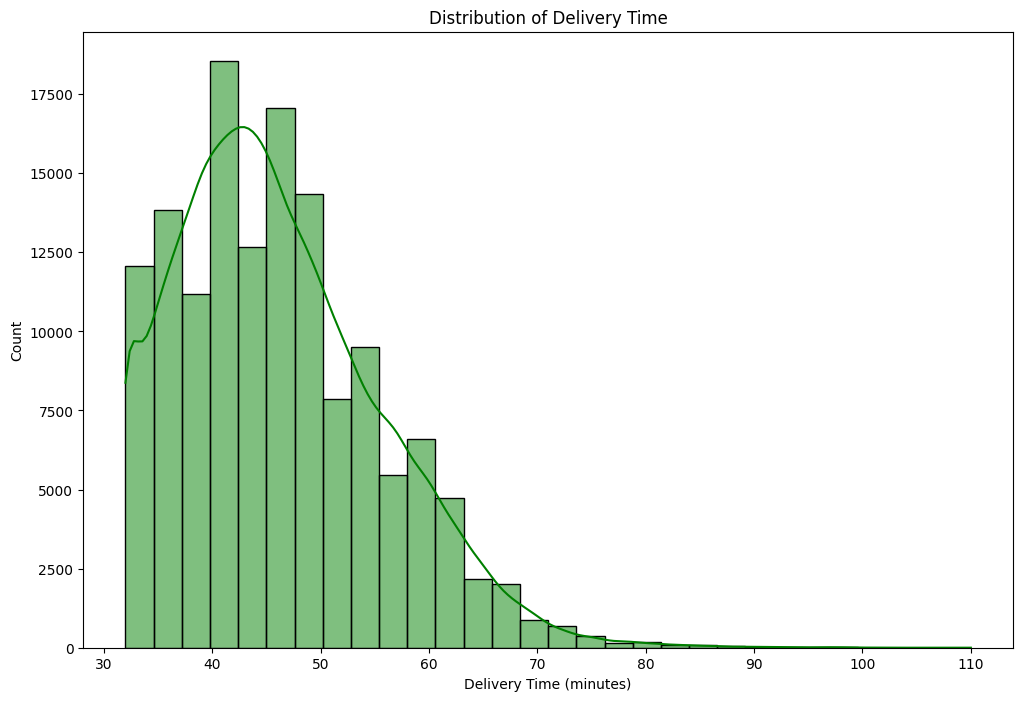

In [798]:
# Distribution of time_taken

# check the distribution of time take 
# use histogram to check 
plt.figure(figsize=(12, 8))
sns.histplot(y_train, bins=30, kde=True, color="Green")
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Count")
plt.show()


In [800]:
# To verify the deliver_time 
print("Number of order took less than 30 min :",(y_train < 30).sum())

Number of order took less than 30 min : 0


### Observation: 
### Avarage time taken to deliver is near 40 minutes and none of the delivery is less than 30 min. <br>

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [805]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5)
    plt.title(f"Delivery Time vs {col}")

plt.tight_layout()
plt.show()

### Observation: 
### Based on the scatter plot, it shows as total_items ,num_distinct_items, min_item_price, total_onshift_dashers and total_busy_dashers are not impacting much
### There is significant impact on distance, subtotal and total_outstanding_orders. <br>

Show the distribution of time_taken for different hours 



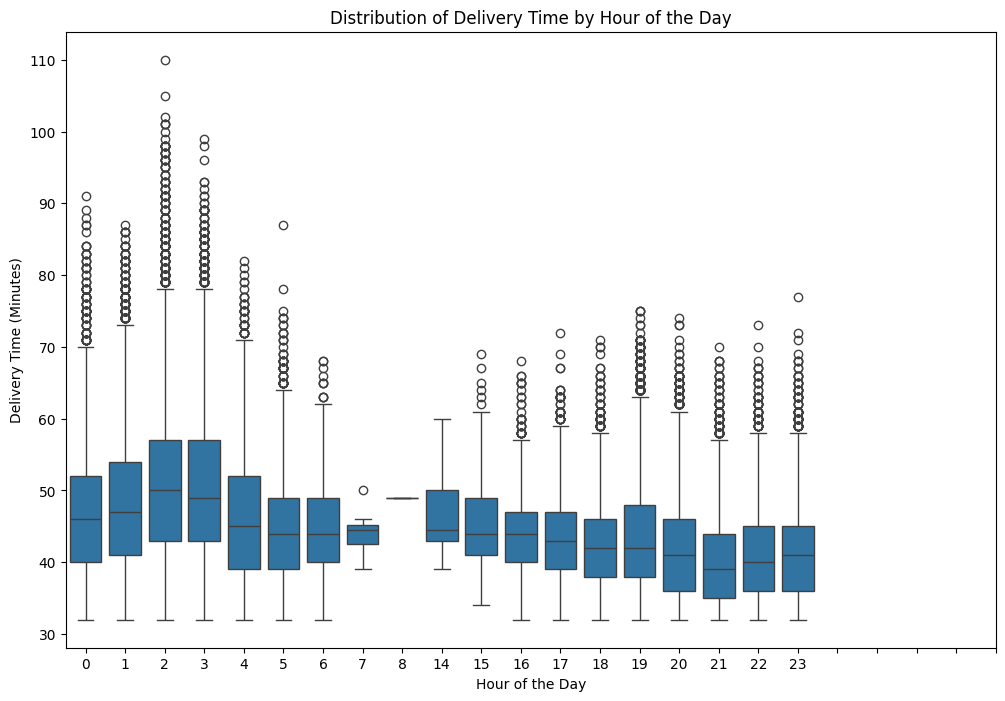

In [808]:
# Show the distribution of time_taken for different hours
print("Show the distribution of time_taken for different hours \n")
# Create order hour from training created_at column
X_train["order_hour"] = df["created_at"].dt.hour

# Plot boxplot find the distribution of features againest time_taken
plt.figure(figsize=(12, 8))
sns.boxplot(x=X_train["order_hour"], y=y_train)
plt.xlabel("Hour of the Day")
plt.ylabel("Delivery Time (Minutes)")
plt.title("Distribution of Delivery Time by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()

# Drop created_at column
X_train = X_train.drop(columns=['created_at'])

Verify avarage delivery time againest every hour 



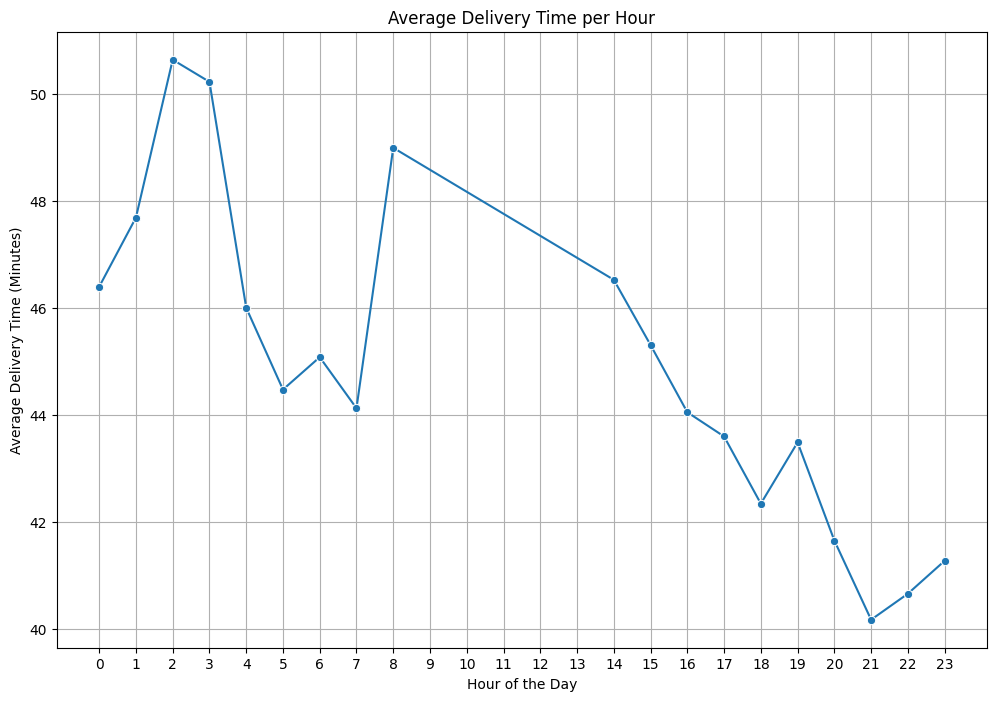

In [810]:
# Verify avarage delivery time againest every hour
print("Verify avarage delivery time againest every hour \n")
# create temporary train data and merge X_train & y_train
train_data = X_train.copy()
train_data["time_taken"] = y_train 

# Calcuale mean delivery for every hour 
avg_hourly_delivery = train_data.groupby("order_hour")["time_taken"].mean()
plt.figure(figsize=(12, 8))
sns.lineplot(x=avg_hourly_delivery.index, y=avg_hourly_delivery.values, marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Delivery Time (Minutes)")
plt.title("Average Delivery Time per Hour")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Observation: 
### Avarage delivery is high between 2 AM & 3 AM and then 8 AM. Very Low at 9 PM
### The above box plot shows there is much outliers between 2 AM and 3 AM <br>

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

Plot the heatmap of the correlation matrix



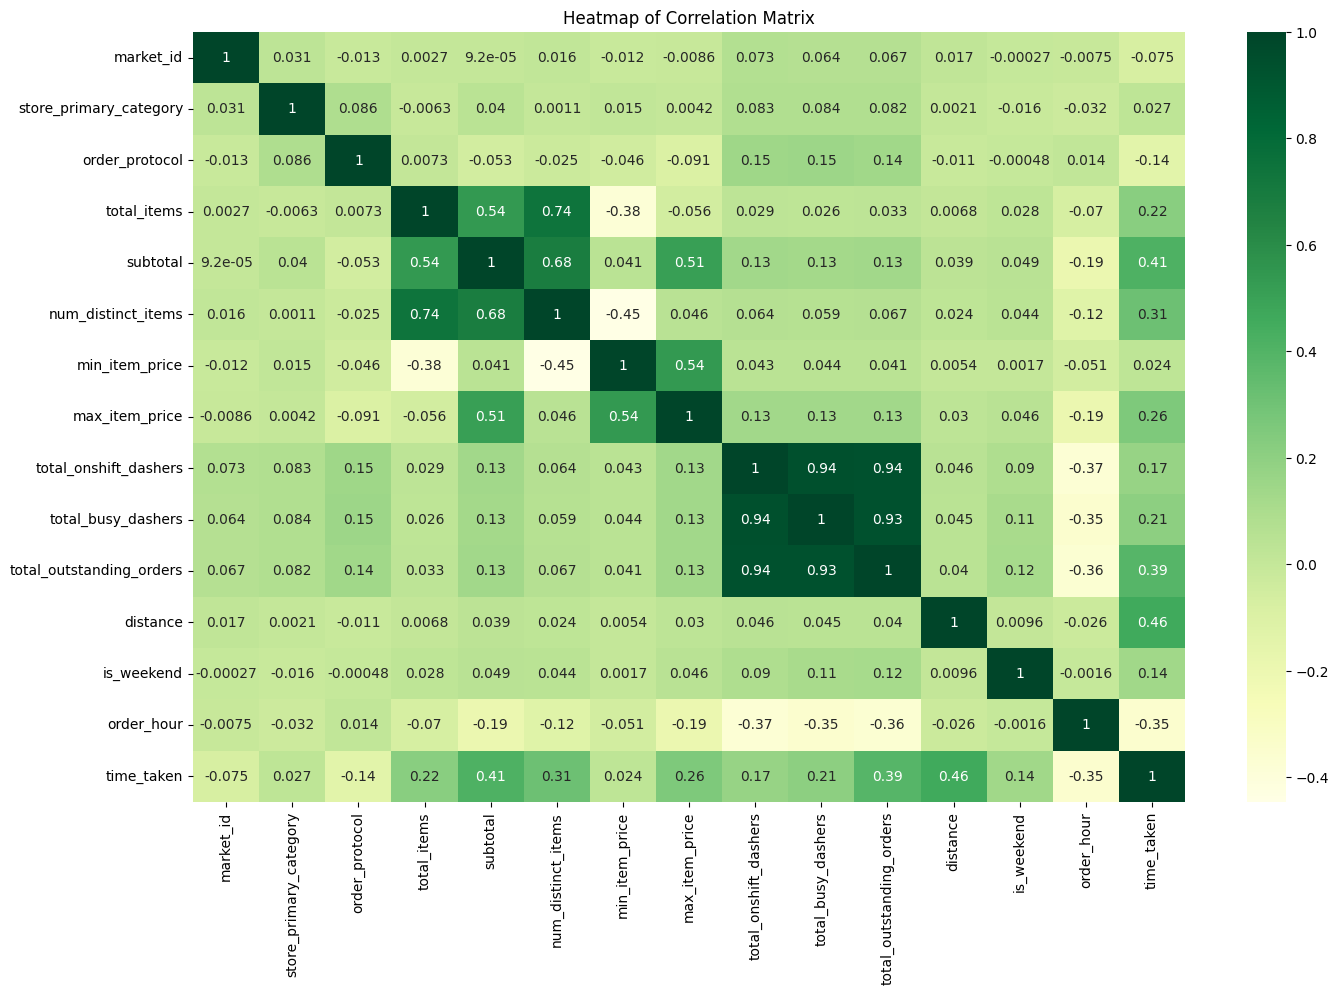

In [815]:
# Plot the heatmap of the correlation matrix
print("Plot the heatmap of the correlation matrix\n")
# user train_data from the above plot to check correlation between all the numerical columns
plt.figure(figsize=(16, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGn")
plt.title("Heatmap of Correlation Matrix")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [820]:
# Drop 3-5 weakly correlated columns from training dataset

corr = train_data.corr()
corr_df = corr['time_taken'].drop('time_taken')

# Find the weekly corrlated colums againest time_taken, weak thrushold is correlation < 0.1
weak_columns = corr_df[corr_df.abs() < 0.1].index.tolist()

print("Weak correlated columns : ",weak_columns)

Weak correlated columns :  ['market_id', 'store_primary_category', 'min_item_price']


## Observation:
## 'market_id', 'store_primary_category', 'min_item_price' are the weak corrlated to time_taken
¶

In [823]:
# Drop the weakly correlated columns from X_train data
X_train = X_train.drop(columns=['market_id', 'store_primary_category', 'min_item_price'])
print("After dropping weak correlated columns \n")
X_train.info()

After dropping weak correlated columns 

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 92179 to 145072
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   order_protocol            140621 non-null  category
 1   total_items               140621 non-null  int64   
 2   subtotal                  140621 non-null  int64   
 3   num_distinct_items        140621 non-null  int64   
 4   max_item_price            140621 non-null  int64   
 5   total_onshift_dashers     140621 non-null  float64 
 6   total_busy_dashers        140621 non-null  float64 
 7   total_outstanding_orders  140621 non-null  float64 
 8   distance                  140621 non-null  float64 
 9   is_weekend                140621 non-null  category
 10  order_hour                140621 non-null  int32   
dtypes: category(2), float64(4), int32(1), int64(4)
memory usage: 10.5 MB


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

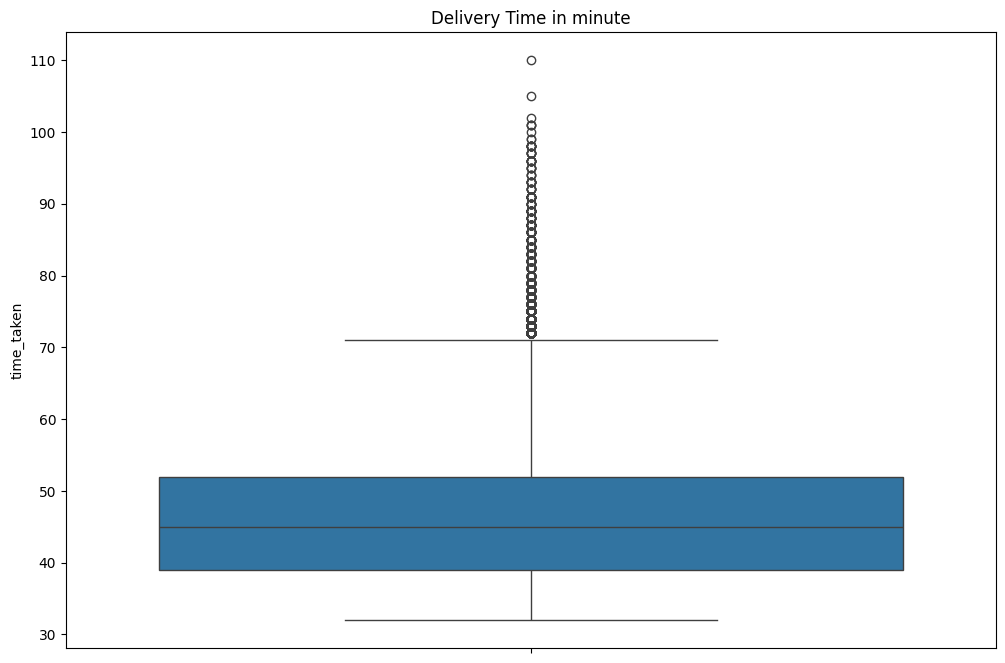

In [827]:
# Boxplot for time_taken

plt.figure(figsize=(12, 8))
sns.boxplot(y=y_train)
plt.title("Delivery Time in minute")
plt.show()

In [831]:
# We have train_data with to check to verify the data

print("total delivery took more than 100 minute : ", (train_data['time_taken'] > 100).sum())
train_data[train_data['time_taken'] > 100].head(10)

total delivery took more than 100 minute :  6


market_id store_primary_category order_protocol  total_items  subtotal  \
96943        2.0                     39            1.0           12      9815   
87780        2.0                     34            5.0            4      6195   
22299        2.0                     68            1.0            3      3085   
58487        2.0                     55            3.0            1      1400   
43790        1.0                      4            1.0            3      3547   
130796       2.0                     39            1.0            4      4380   

        num_distinct_items  min_item_price  max_item_price  \
96943                   10             550            1495   
87780                    4              99            2499   
22299                    3             895            1195   
58487                    1            1400            1400   
43790                    3             822            1689   
130796                   4             395            1595   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
96943                    77.0                82.0                     200.0   
87780                    78.0                77.0                     198.0   
22299                    74.0                69.0                     186.0   
58487                    73.0                76.0                     193.0   
43790                    38.0                37.0                      96.0   
130796                   78.0                77.0                     198.0   

        distance is_weekend  order_hour  time_taken  
96943      29.72      False           2       110.0  
87780      29.00      False           2       102.0  
22299      32.96      False           2       101.0  
58487      31.08      False           2       101.0  
43790      43.64      False           2       101.0  
130796     34.44      False           2       105.0

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [834]:
# Handle outliers

# Create temp df 
# create temporary train data and merge X_train & y_train
train_data = X_train.copy()
train_data["time_taken"] = y_train 

# Since we dropped min_item_price from the training data, it need to drop from numerical_cols list
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns ", numerical_cols)
print("Shape before outliers ", train_data.shape)
# We will use capping method as data set is not large and set lower and upper percetile very low so that it should not remve the real data
# lower and upper percentile set only 10
def cap_outliers(df, columns, lower_percentile=0.25, upper_percentile=0.75):
    df_capped = df.copy()
    for col in columns:
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        df_capped[col] = np.clip(df[col], lower_bound, upper_bound)
    return df_capped

    
train_data_capped = cap_outliers(train_data, numerical_cols)

print("Shape after outliers ", train_data_capped.shape)



Numerical columns  ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken']
Shape before outliers  (140621, 12)
Shape after outliers  (140621, 12)


### Observation: 
### capping method is used to remove outliers with lower 25 and upper 75 percentile. Outlier are data is a valid data as we saw the data for delivey time exceeded 100 minutes, all the data look correct. <br>

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [838]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Numerical columms should be int and float types
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

# categorical columns should be category type
categorical_cols = X_test.select_dtypes(include=['category']).columns.tolist()


print("Nuberical columns :", numerical_cols)
print("\nCategorical colums : ", categorical_cols)


Nuberical columns : ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

Categorical colums :  ['market_id', 'store_primary_category', 'order_protocol', 'is_weekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

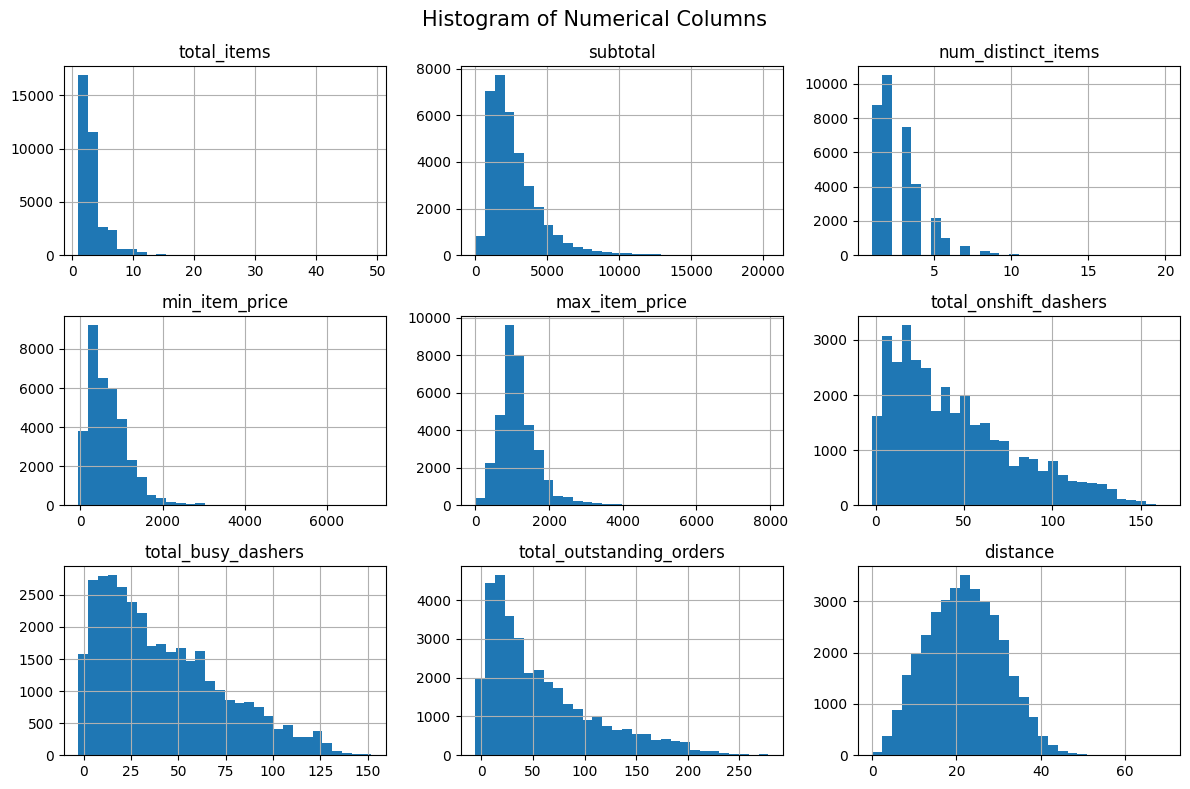

In [842]:
# Plot distributions for all numerical columns
# Repeat the same test with X_test

# check the distribution  & skewness through histogram plot
X_test[numerical_cols].hist(figsize=(12,8), bins=30)
plt.suptitle("Histogram of Numerical Columns", fontsize=15)
plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

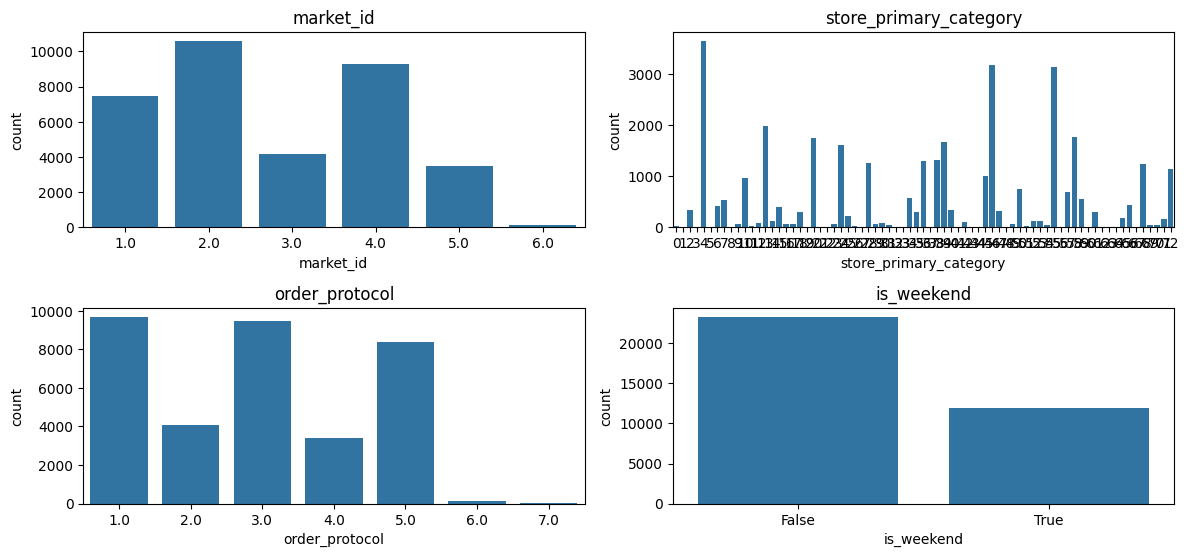

In [845]:
# Distribution of categorical columns

# For categorical columns best suits is countplot 
plt.figure(figsize=(12,8))

# Use subplot to show in single figure


plt.subplot(3,2,1)
sns.countplot(x='market_id', data=X_test)
plt.title("market_id")

plt.subplot(3,2,2)
sns.countplot(x='store_primary_category', data=X_test)
plt.title("store_primary_category")

plt.subplot(3,2,3)
sns.countplot(x='order_protocol', data=X_test)
plt.title("order_protocol")

plt.subplot(3,2,4)
sns.countplot(x='is_weekend', data=X_test)
plt.title("is_weekend")

plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [848]:
# Distribution of time_taken

# check the distribution of time take 
# use histogram to check 
plt.figure(figsize=(12, 8))
sns.histplot(y_test, bins=30, kde=True, color="Green")
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Count")
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [851]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.5)
    plt.title(f"Delivery Time vs {col}")

plt.tight_layout()
plt.show()


In [853]:
# Find the correlation 
test_data = X_test.copy()
test_data["time_taken"] = y_test

# Drop created_at from the dataset
test_data = test_data.drop(columns=['created_at'])
# user train_data from the above plot to check correlation between all the numerical columns
plt.figure(figsize=(16, 10))
sns.heatmap(test_data.corr(), annot=True, cmap="YlGn")
plt.title("Heatmap of Correlation Matrix")
plt.show()


In [855]:
corr = test_data.corr()
corr_df = corr['time_taken'].drop('time_taken')

# Find the weekly corrlated colums againest time_taken, weak thrushold is correlation < 0.1
weak_columns = corr_df[corr_df.abs() < 0.1].index.tolist()

print("Weak correlated columns : ",weak_columns)

Weak correlated columns :  ['market_id', 'store_primary_category', 'min_item_price']


#### **4.3** Drop the columns with weak correlations with the target variable

In [858]:
# Drop the weakly correlated columns from training dataset
X_test = X_test.drop(columns=['market_id', 'store_primary_category', 'min_item_price'])
print("After dropping weak columns \n",X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 11670 to 77061
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   created_at                35156 non-null  datetime64[ns]
 1   order_protocol            35156 non-null  category      
 2   total_items               35156 non-null  int64         
 3   subtotal                  35156 non-null  int64         
 4   num_distinct_items        35156 non-null  int64         
 5   max_item_price            35156 non-null  int64         
 6   total_onshift_dashers     35156 non-null  float64       
 7   total_busy_dashers        35156 non-null  float64       
 8   total_outstanding_orders  35156 non-null  float64       
 9   distance                  35156 non-null  float64       
 10  is_weekend                35156 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(4), int64(4)
memory usage: 2.7 MB
Afte

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [555]:
# Import libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE


In [862]:

train_data.info()
X = train_data.drop('time_taken', axis=1)
# As deliver time is our target so y should be time_taken
y = train_data['time_taken']
print("Split training and test data \n")
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train[features].head()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 92179 to 145072
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   order_protocol            140621 non-null  category
 1   total_items               140621 non-null  int64   
 2   subtotal                  140621 non-null  int64   
 3   num_distinct_items        140621 non-null  int64   
 4   max_item_price            140621 non-null  int64   
 5   total_onshift_dashers     140621 non-null  float64 
 6   total_busy_dashers        140621 non-null  float64 
 7   total_outstanding_orders  140621 non-null  float64 
 8   distance                  140621 non-null  float64 
 9   is_weekend                140621 non-null  category
 10  order_hour                140621 non-null  int32   
 11  time_taken                140621 non-null  float64 
dtypes: category(2), float64(5), int32(1), int64(4)
memory usage: 11.5 MB
Split training and

total_items  subtotal  num_distinct_items  max_item_price  \
159336            5      5930                   5            1295   
69470             2      2335                   2             995   
132708            1      1499                   1            1499   
93344             9      1522                   4             299   
52869             4      2552                   4            1199   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
159336                  134.0                76.0                     136.0   
69470                    14.0                14.0                      13.0   
132708                    1.0                 0.0                       0.0   
93344                    15.0                13.0                      13.0   
52869                    54.0                58.0                      92.0   

        distance  
159336     15.52  
69470      18.76  
132708     18.28  
93344      19.32  
52869      14.52

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [865]:
# Apply scaling to the numerical columns

# Initialize StandardScaler
scaler = StandardScaler()
print("Initialize StandardScaler")

# Fit and transform on training data
X_train[features] = scaler.fit_transform(X_train[features])
print("Fit and transform on training data\n")
# Transorm the test data 
X_test[features] = scaler.transform(X_test[features])
print("Transorm the test data ")
X_train.head(), X_test.head()

Initialize StandardScaler
Fit and transform on training data

Transorm the test data 


(       order_protocol  total_items  subtotal  num_distinct_items  \
 159336            3.0     0.642363  1.775701            1.430250   
 69470             1.0    -0.433459 -0.195402           -0.414819   
 132708            4.0    -0.792066 -0.653773           -1.029842   
 93344             4.0     2.076793 -0.641162            0.815227   
 52869             3.0     0.283756 -0.076423            0.815227   
 
         max_item_price  total_onshift_dashers  total_busy_dashers  \
 159336        0.242686               2.581651            1.062321   
 69470        -0.291156              -0.893294           -0.864111   
 132708        0.605699              -1.269747           -1.299112   
 93344        -1.529670              -0.864336           -0.895182   
 52869         0.071857               0.265021            0.503035   
 
         total_outstanding_orders  distance is_weekend  order_hour  
 159336                  1.476643 -0.723909       True           2  
 69470                  

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [870]:
# Create/Initialise the model
lr = LinearRegression()

In [872]:
# Train the model using the training data
lr.fit(X_train, y_train)


LinearRegression()

In [874]:
# Make predictions
y_train_pred = lr.predict(X_train)

# Make predictions on the test set
y_test_pred = lr.predict(X_test)


In [876]:
# Find results for evaluation metrics for training 
# Calculate evaluation metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)
print("Metrics for training data with Linear Regression model")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2):: {r2:.4f}")

Metrics for training data with Linear Regression model
Mean Absolute Error (MAE): 2.38
Mean Squared Error (MSE): 11.05
Root Mean Squared Error (RMSE): 3.32
R-squared (R2):: 0.8732


In [878]:
# Find results for evaluation metrics for test 
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
print("Metrics for test data Linear Regression model")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2):: {r2:.4f}")

Metrics for test data Linear Regression model
Mean Absolute Error (MAE): 2.38
Mean Squared Error (MSE): 11.02
Root Mean Squared Error (RMSE): 3.32
R-squared (R2):: 0.8731


### Observation : R² Score: 87%

In [881]:

feature_colmn = X_train.columns.tolist()

# Get the coefficients of the trained model
coeff = lr.coef_

# Create a DataFrame to display feature names and their coefficients
feature_coefficients = pd.DataFrame({'features': feature_colmn, 'coeff_value': coeff})
feature_coefficients['abs_coeff'] = feature_coefficients['coeff_value'].abs()
feature_coefficients = feature_coefficients.sort_values(by='abs_coeff', ascending=False).drop(columns='abs_coeff')

print("Feature and coefficients:")
print(feature_coefficients)

Feature and coefficients:
                    features  coeff_value
7   total_outstanding_orders    18.301279
5      total_onshift_dashers   -12.597175
6         total_busy_dashers    -4.503699
8                   distance     4.149831
2                   subtotal     2.327726
9                 is_weekend     1.218677
3         num_distinct_items     0.823676
0             order_protocol    -0.656917
4             max_item_price     0.362995
10                order_hour    -0.252250
1                total_items    -0.090733


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [886]:
# Loop through the number of features and test the model


rfe = RFE(estimator=lr, n_features_to_select=8)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['order_protocol', 'subtotal', 'num_distinct_items',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'is_weekend'],
      dtype='object')


In [888]:
# Agian build the final model with selected 8 features 
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

lr.fit(X_train_final, y_train)

# predict y
y_train_pred = lr.predict(X_train_final)
y_test_pred = lr.predict(X_test_final)

# Find results for evaluation metrics for training 
# Calculate evaluation metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)
print("Metrics for training data")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2):: {r2:.4f}")

# Find results for evaluation metrics for test 
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
print("")
print("Metrics for test data")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2):: {r2:.4f}")


Metrics for training data
Mean Absolute Error (MAE): 2.91
Mean Squared Error (MSE): 15.23
Root Mean Squared Error (RMSE): 3.90
R-squared (R2):: 0.8252

Metrics for test data
Mean Absolute Error (MAE): 2.92
Mean Squared Error (MSE): 15.13
Root Mean Squared Error (RMSE): 3.89
R-squared (R2):: 0.8257


In [890]:
# Get the list of training features
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Rank': rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by='Rank')

print(feature_ranking)

                     Feature  Rank
0             order_protocol     1
2                   subtotal     1
3         num_distinct_items     1
5      total_onshift_dashers     1
6         total_busy_dashers     1
7   total_outstanding_orders     1
8                   distance     1
9                 is_weekend     1
4             max_item_price     2
10                order_hour     3
1                total_items     4


In [892]:
# Check with OLS model 
import statsmodels.api as sm

X = train_data.drop('time_taken', axis=1)
# As deliver time is our target so y should be time_taken
y = train_data['time_taken']
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

X_train_lm = pd.DataFrame(X_train_scaled, index=X_train.index, columns=features)

# Add a constant column for the intercept
X_train_lm = sm.add_constant(X_train_lm)

# Fit the OLS model
lr_m1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_m1.summary())
print(lr_m1.params)

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 6.054e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:38:35   Log-Likelihood:            -3.1703e+05
No. Observations:              112496   AIC:                         6.341e+05
Df Residuals:                  112487   BIC:                         6.342e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

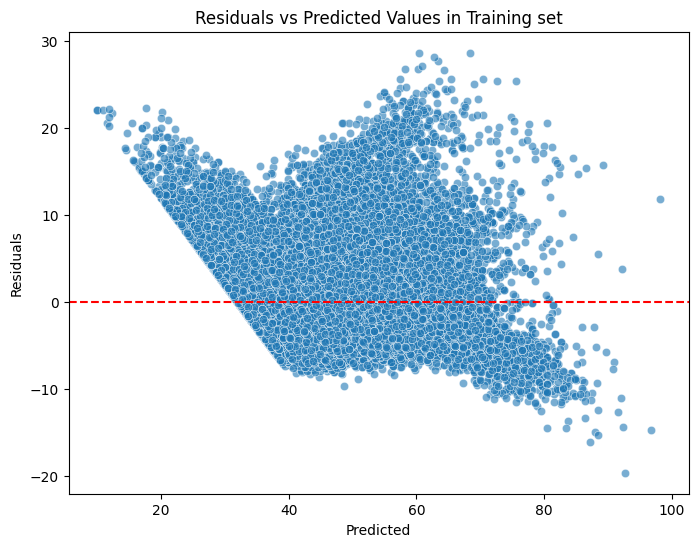

In [896]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# calculate residuals 
residuals = y_train - y_train_pred
# Scatter plot for residuals in training set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values in Training set')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()
        


Text(0.5, 1.0, 'Q-Q Plot of Residuals')

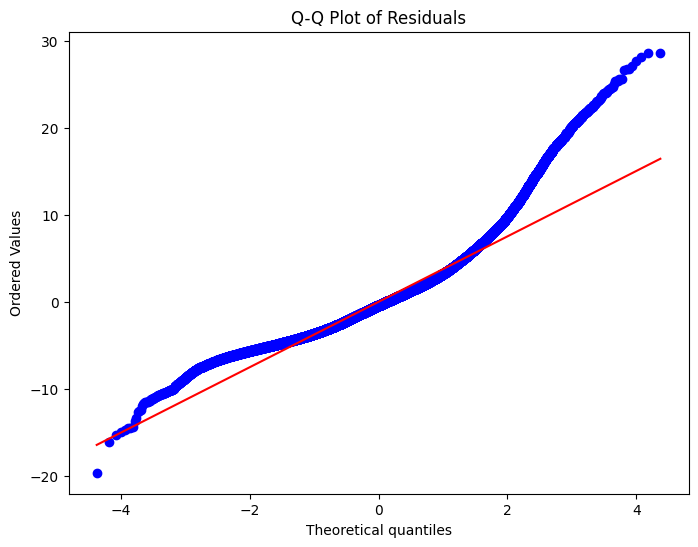

In [898]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

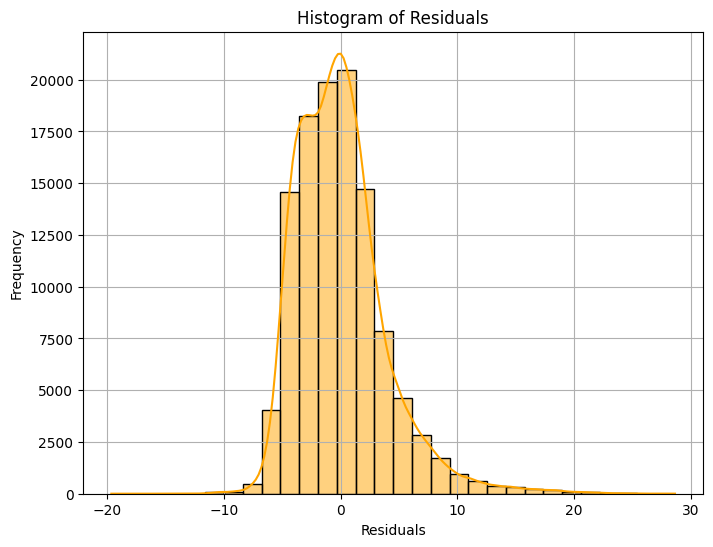

In [900]:
# Plot Residual Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="Orange")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid()

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [905]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [908]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes, there are categorical variables in the data<br>
> Below are the categorical variables<br>
> ['market_id', 'store_primary_category’, ‘order_protocol’, ‘is_weekend’, ‘order_hour’] <br>
> Based on the analysis except order_hour has some impact on the dependent variable



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size 0.2 is using train_test_split method to make sure training data and test data should split in to 80% and 20% of the complete dataset



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> from the heatmap of all numerical columns the heighest correlation is between target variable time_taken and distance. <br> The correlation value is 0.64. i.e 64% 



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> I used capping method. This will make sure to remove any outlier on lower and uppper percentile. I have set lower 25% percentile and upper limit 75 percetile to remove the outlier. When checked the outlier with time_taken, these values are not outliers. Since ditance is more it make sense to have more time to deliver



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the feature ranking analysis below are the 3 top features significantly affecting to the delivery <br>
> order_protocol <br>
> subtotal <br>
> num_distinct_items <br>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> <b>Its algorithm to create model between target variable and features.</b>
> <br>Formula is Y = mX + c <br>
> Y is predected value ( target variable )<br>
> X is feature / independent variable <br>
> m is coefficient <br>
> c is intercept <br>
> This algorithm used when target variable is in continues type.<br>
> For example price rate of house rent <br>
> <br>
> <b>For multiple indepent variables formula is</b> <br> 
> Y = c + b1 X1 + b2 X2 + ... bn Xn <br>
> c is intercept <br>
> b1, b2, b3 ... bn are coefficient of independent variable <br>
> X1, X2, X3 ... Xn are feature / independent variables<br>
> <br>
> 



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> The main difference between simple and multiple linear regression is, in simple linear regression there is one dependent variable and in multiple linear regression, there are more than one dependent variables. <br>
> Simple linear regression formula : Y=mX+c<br>
> Multiple linear regression formula : Y = c + b1 X1 + b2 X2 + ... bn Xn <br>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> cost function in linear regression guide the model to minimise the error between predicted and actual values. 




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting <br>
> The model fit well to training data and poor to new data. That means model memorizes well on training data and not perform good with new data
> <br>
> It usually happen when there very low error in training data but high error in test data <br>
> Model is too complex<br>
> <br>
> <br> 
> Underfitting <br>
> the model fails to capture performance of the training data and perform poor in test data <br>
> It happens when there very high error in both training and test data <br>
> Model is too simple <br><br>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residuals are difference between actual value and predicted variable <br>
> Formual is R = Y - Y^ <br>
> Dist plot can visualize Residuals. and it should scatter around zero <br>